In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_armonk")

ibmqfactory.load_account:WARNING:2021-09-23 09:01:01,238: Credentials are already in use. The existing account in the session will be replaced.


# T1 Experiment

In [3]:
from qiskit_experiments.library.characterization import T1

t1_delays = list(range(0, 800, 50))

# Create an experiment for qubit 0,
# setting the unit to microseconds,
# with the specified time intervals
exp = T1(qubit=0, delays=t1_delays, unit="us")
print(exp.circuits()[0])

     ┌───┐ ░ ┌──────────────┐ ░ ┌─┐
q_0: ┤ X ├─░─┤ Delay(0[us]) ├─░─┤M├
     └───┘ ░ └──────────────┘ ░ └╥┘
c: 1/════════════════════════════╩═
                                 0 


In [4]:
# Run the experiment circuits with 1000 shots each,
# and analyze the result

t1_expdata = exp.run(backend=backend, shots=1000).block_for_results()
t1_expdata.save()

/opt/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Unable to save the experiment data: Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/qiskit_experiments/database_service/utils.py", line 152, in save_data
    return True, new_func(**kwargs)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/experiment/ibm_experiment_service.py", line 631, in create_analysis_result
    response = self._api_client.analysis_result_upload(
  File "/opt/conda/lib/python3.8/contextlib.py", line 131, in __exit__
    self.gen.throw(type, value, traceback)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/experiment/utils.py", line 33, in map_api_error
    raise IBMQApiError(f"Failed to process the request: {api_err}") from None
qiskit.providers.ibmq.exceptions.IBMQApiError: 'Failed to

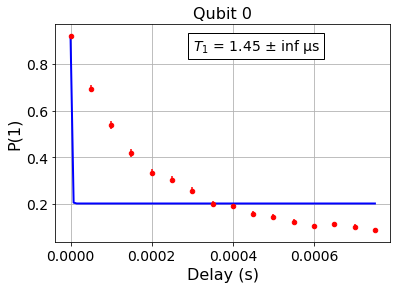

DbAnalysisResultV1
- name: T1
- value: 1.4463585738871076e-06 ± inf s
- χ²: 189.8154963380072
- quality: bad
- extra: <9 items>
- device_components: ['Q0']
- verified: False


In [6]:
display(t1_expdata.figure(0))
for result in t1_expdata.analysis_results():
    print(result)

# Load an experiment from the database

In [11]:
from qiskit_experiments.database_service import DbExperimentDataV1 as DbExperimentData

load_exp = DbExperimentData.load("429b3f6a-1687-4abc-ac5c-fcaae25e531d", provider.service("experiment"))

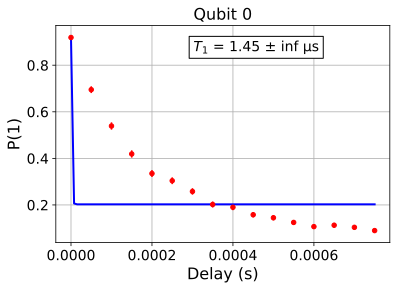

In [12]:
from IPython.display import SVG
SVG(load_exp.figure(0))

In [14]:
for result in load_exp.analysis_results():
    print(result)

# Auto save an experiment

In [15]:
exp = T1(qubit=0, delays=t1_delays, unit="us")

t1_expdata = exp.run(backend=backend, shots=1000)
t1_expdata.auto_save = True
t1_expdata.block_for_results()

Not all post-processing has finished. Consider calling save() again after all post-processing is done to save any newly generated data.


ExperimentData(T1, 8e36608d-c596-4e8f-9f7c-85ac6788ecfe, backend=ibmq_armonk, job_ids=['614c566d3fca3244dd96e6ee'])

# Delete an experiment

In [16]:
t1_expdata.delete_figure(0)
t1_expdata.delete_analysis_result(0)


Are you sure you want to delete the experiment plot? [y/N]:  y

Are you sure you want to delete the analysis result? [y/N]:  y


'749c47c8-14bd-4be7-8c1c-f2fcd19a4325'

# State Tomography Experiment

In [18]:
from qiskit_experiments.library import StateTomography
import qiskit

# Construct state by applying H gate
qc_h = qiskit.QuantumCircuit(1)
qc_h.h(0)

qstexp = StateTomography(qc_h)
qst_expdata = qstexp.run(backend).block_for_results()
qst_expdata.save()

for result in qst_expdata.analysis_results():
    print(result)

DbAnalysisResultV1
- name: state
- value: DensityMatrix([[0.55371094+0.j        , 0.4140625 -0.01464844j],
               [0.4140625 +0.01464844j, 0.44628906+0.j        ]],
              dims=(2,))
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: state_fidelity
- value: 0.9140625
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: positive
- value: True
- device_components: ['Q0']
- verified: False


# RB Experiment

In [20]:
from qiskit_experiments.library import randomized_benchmarking as rb

lengths = list(range(1, 1000, 200))
num_samples = 10
seed = 1010

rb_exp = rb.StandardRB([0], lengths, num_samples=num_samples, seed=seed)
rb_expdata = rb_exp.run(backend).block_for_results()
rb_expdata.save()

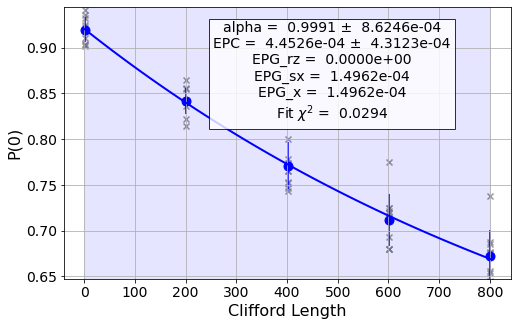

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.49395446 0.99910949 0.426862  ] ± [0.35186746 0.00086246 0.35694964]
- χ²: 0.02944362115518095
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9991094890449048 ± 0.0008624563602223433
- χ²: 0.02944362115518095
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0004452554775475903 ± 0.00043122818011117166
- χ²: 0.02944362115518095
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0
- χ²: 0.02944362115518095
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00014962200850439158
- χ²: 0.02944362115518095
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00014962200850439158
- χ²: 0.02944362115518095
- device_components: ['Q0']
- verified: False


In [21]:
display(rb_expdata.figure(0))
for result in rb_expdata.analysis_results():
    print(result)